In [6]:
import warnings, os, textwrap, sys, math, gc, random
warnings.filterwarnings('ignore')

!pip install -U pandas #to upgrade the pandas version because I found some errors with the old version
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from pathlib import Path
from collections import Counter

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 5)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

print('all setup done, perfecto 👌')

all setup done, perfecto 👌


In [1]:
from google.colab import files
upload = files.upload()

Saving hotel_bookings.csv to hotel_bookings.csv


In [3]:
import pandas as pd
df = pd.read_csv("hotel_bookings.csv")

In [7]:
def memory_mb(dframe):
    return dframe.memory_usage(deep=True).sum() / 1024**2

print('Shape: ', df.shape, 'Memory (MB): ', round(memory_mb(df), 2))
display(df.sample(5, random_state=SEED))
print('\n.dtypes: ')
print(df.dtypes.sort_values())
print('\n.info(): ')
df.info()
display(df.describe(include='all').T.head(12))

if 'is_canceled' in df.columns:
    print('\nTarget distribution (is_canceled): ')
    print(df['is_canceled'].value_counts(dropna=False, normalize=True).rename('pct'))

Shape:  (119390, 32) Memory (MB):  93.9


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
30946,Resort Hotel,0,203,2016,December,49,2,2,5,2,0.0,0,BB,GBR,Direct,Direct,0,0,0,F,F,4,No Deposit,250.0,NaN,0,Transient,66.8,0,0,Check-Out,2016-12-09
40207,City Hotel,1,82,2015,July,29,16,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,76.5,0,0,Canceled,2015-07-16
103708,City Hotel,0,25,2016,December,53,27,0,3,3,0.0,0,BB,BRA,Offline TA/TO,TA/TO,0,0,0,A,K,2,No Deposit,220.0,NaN,0,Transient-Party,60.0,0,1,Check-Out,2016-12-30
85144,City Hotel,0,1,2016,March,11,9,0,1,1,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient-Party,95.0,0,0,Check-Out,2016-03-10
109991,City Hotel,0,70,2017,April,16,16,2,2,2,0.0,0,SC,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,108.0,0,0,Check-Out,2017-04-20



.dtypes: 
booking_changes                     int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
required_car_parking_spaces         int64
babies                              int64
adults                              int64
days_in_waiting_list                int64
stays_in_week_nights                int64
arrival_date_day_of_month           int64
arrival_date_week_number            int64
total_of_special_requests           int64
arrival_date_year                   int64
lead_time                           int64
is_canceled                         int64
stays_in_weekend_nights             int64
is_repeated_guest                   int64
company                           float64
children                          float64
adr                               float64
agent                             float64
customer_type                      object
hotel                              object
distribution_channel               object
assigned_room_type     

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
hotel,119390,2,City Hotel,79330,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_canceled,119390.0,NaN,NaN,NaN,0.370416,0.482918,0.0,0.0,0.0,1.0,1.0
lead_time,119390.0,NaN,NaN,NaN,104.011416,106.863097,0.0,18.0,69.0,160.0,737.0
arrival_date_year,119390.0,NaN,NaN,NaN,2016.156554,0.707476,2015.0,2016.0,2016.0,2017.0,2017.0
arrival_date_month,119390,12,August,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival_date_week_number,119390.0,NaN,NaN,NaN,27.165173,13.605138,1.0,16.0,28.0,38.0,53.0
arrival_date_day_of_month,119390.0,NaN,NaN,NaN,15.798241,8.780829,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,119390.0,NaN,NaN,NaN,0.927599,0.998613,0.0,0.0,1.0,2.0,19.0
stays_in_week_nights,119390.0,NaN,NaN,NaN,2.500302,1.908286,0.0,1.0,2.0,3.0,50.0
adults,119390.0,NaN,NaN,NaN,1.856403,0.579261,0.0,2.0,2.0,2.0,55.0



Target distribution (is_canceled): 
is_canceled
0    0.629584
1    0.370416
Name: pct, dtype: float64


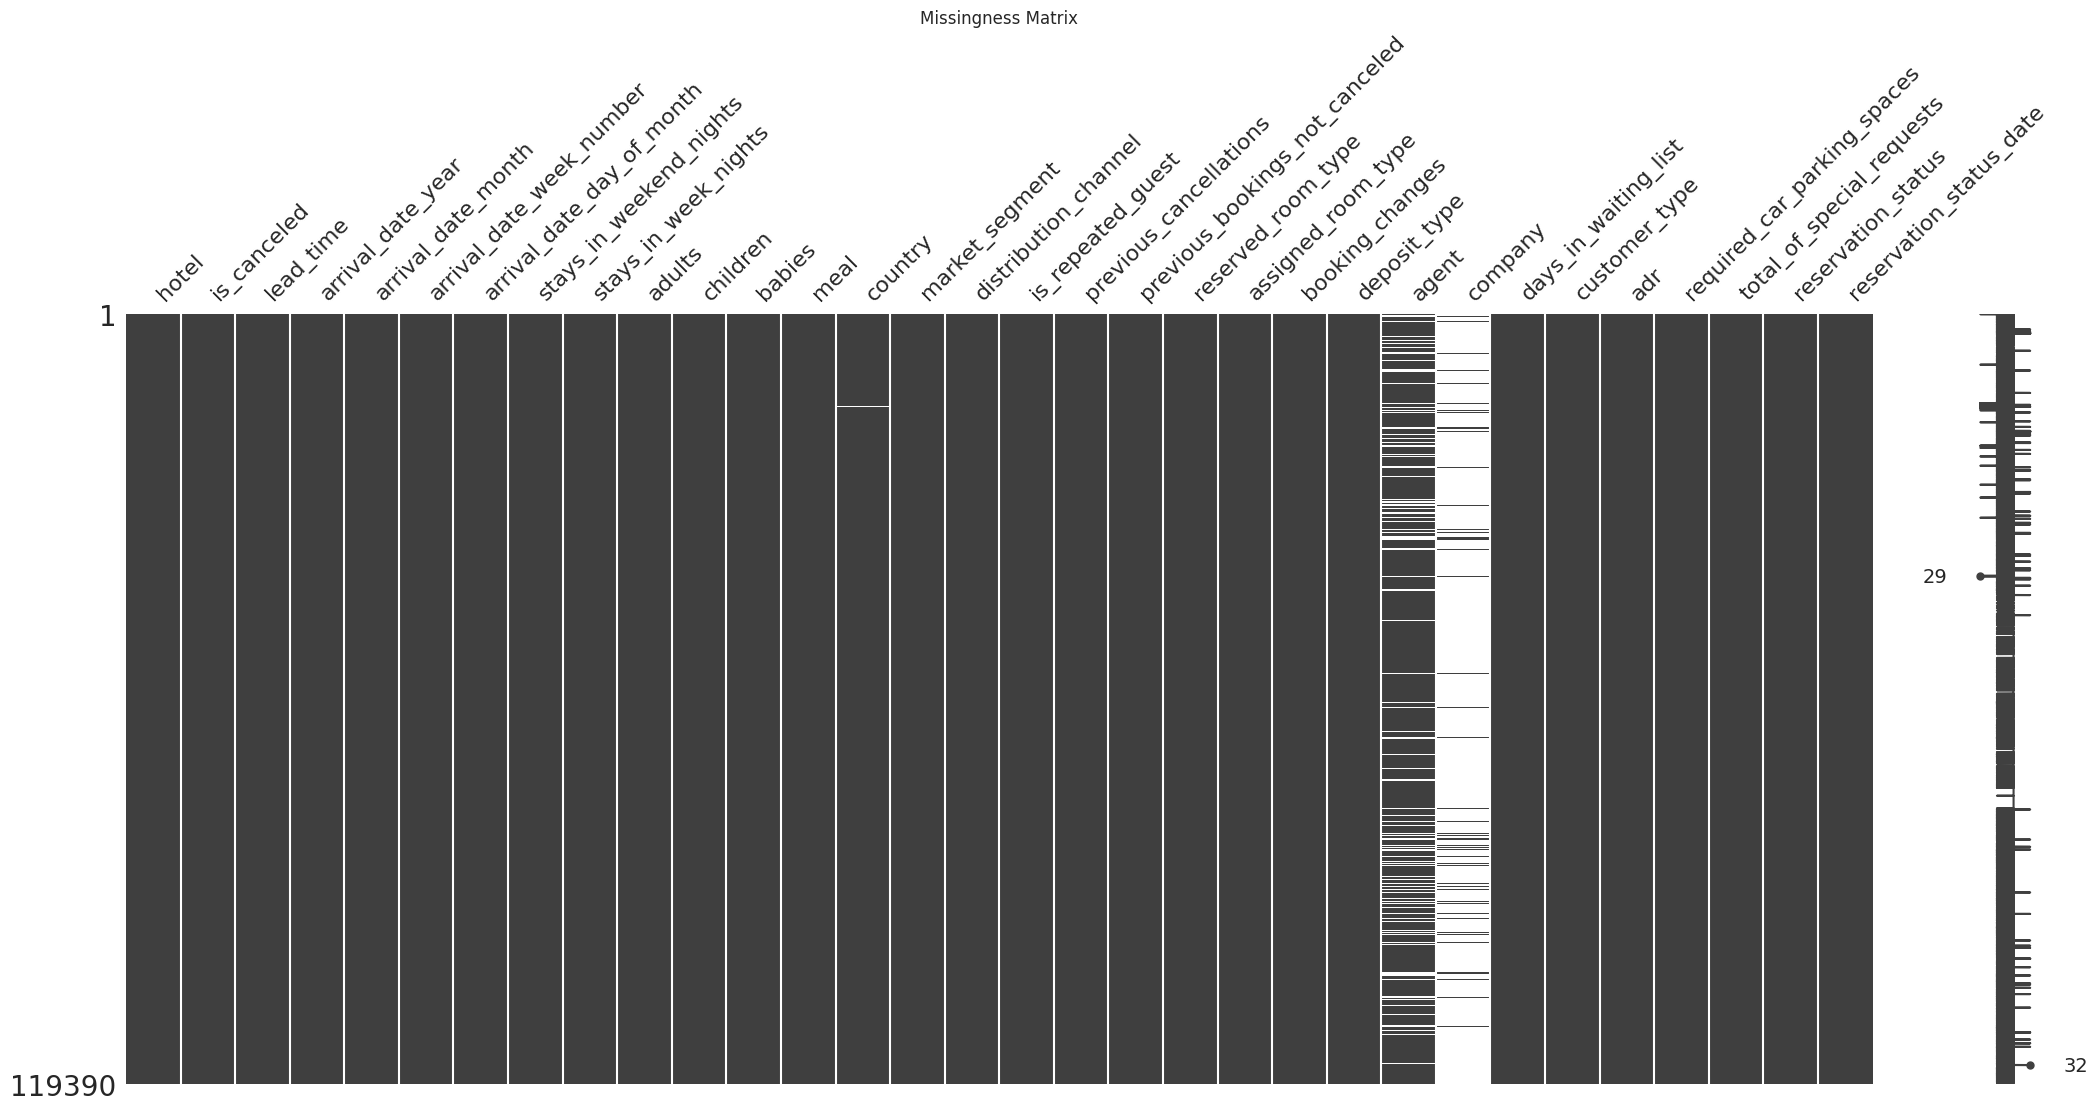

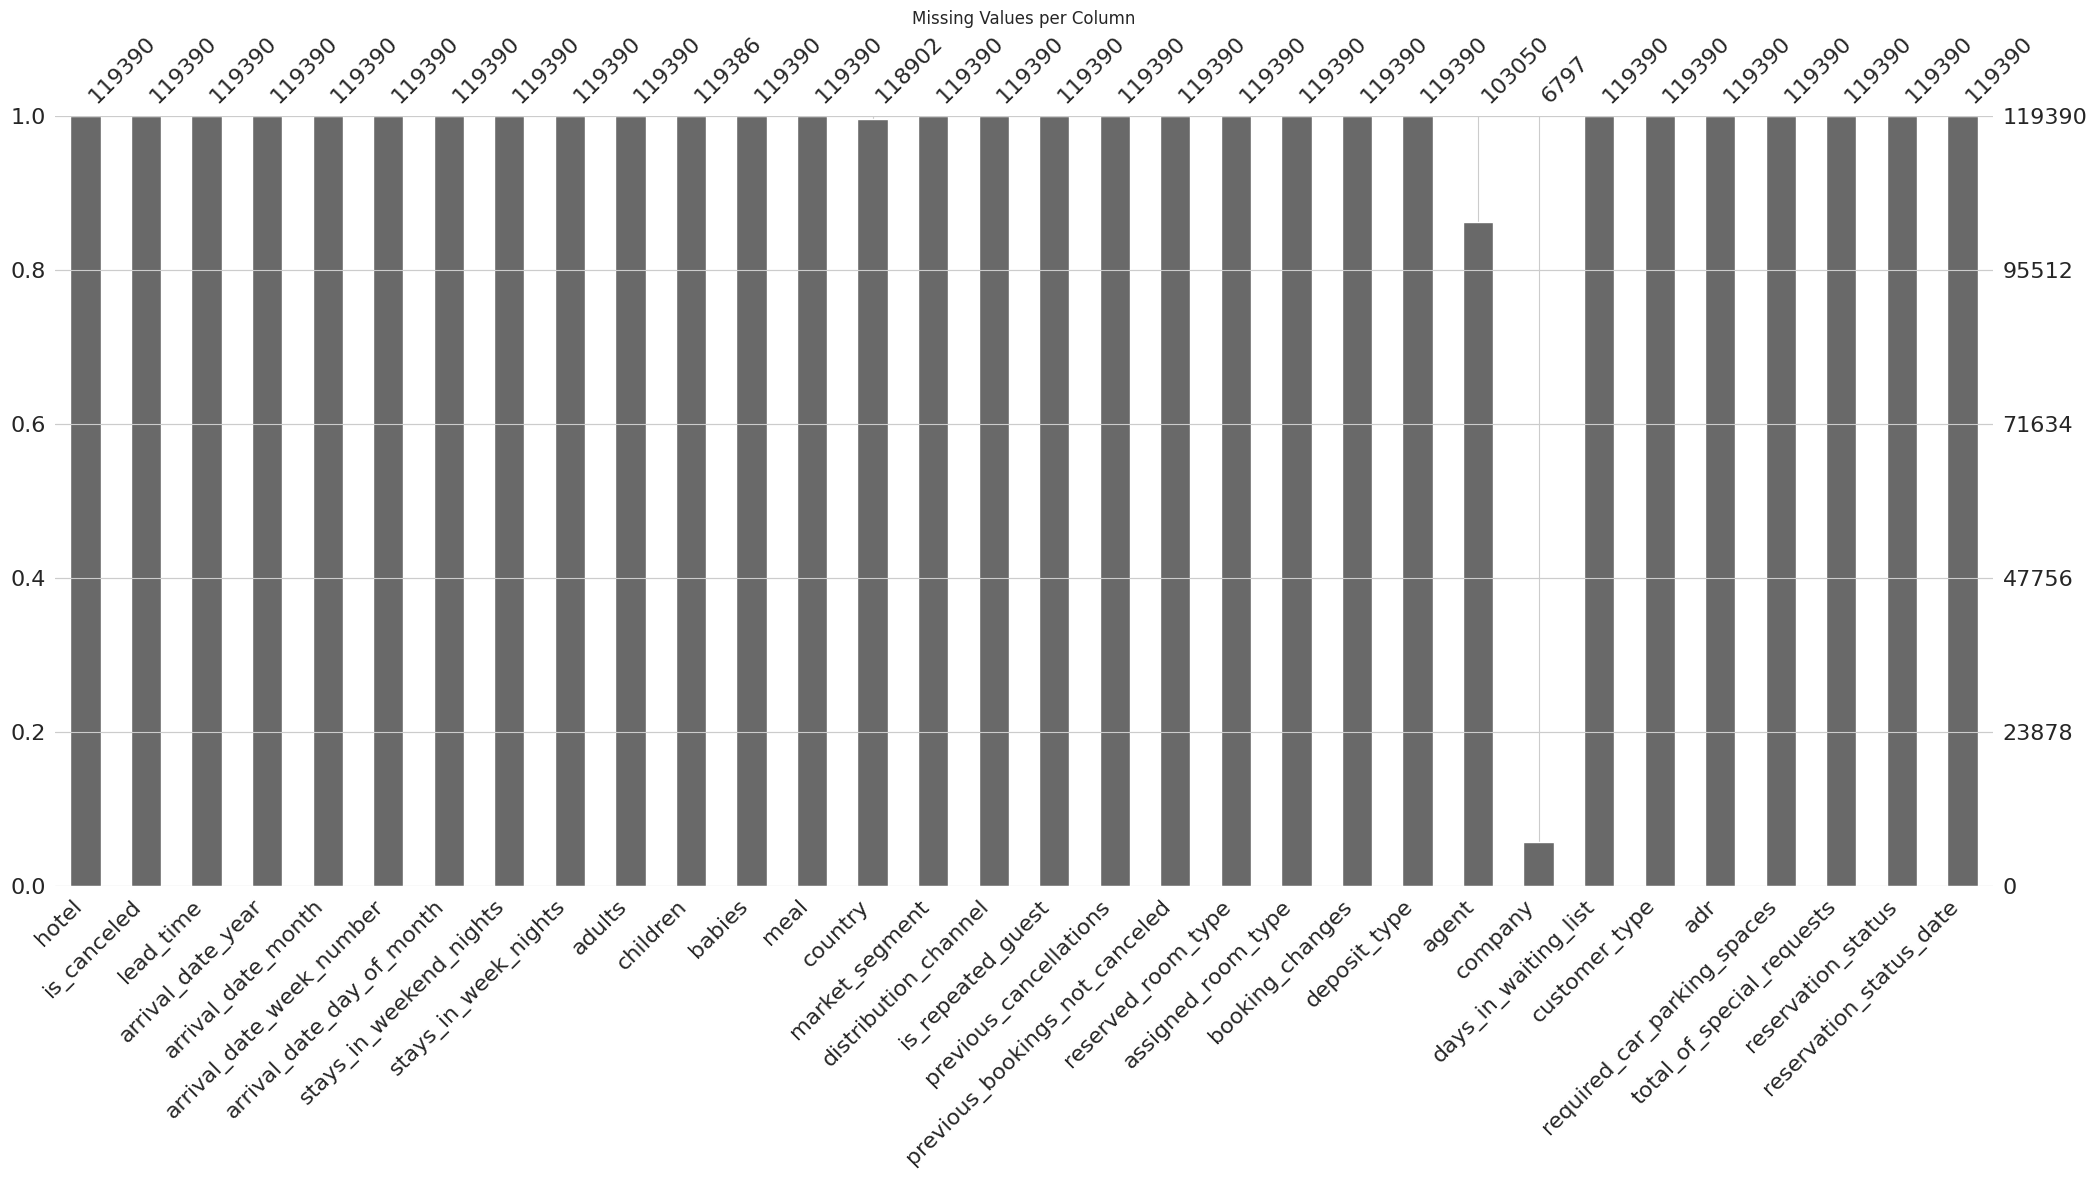

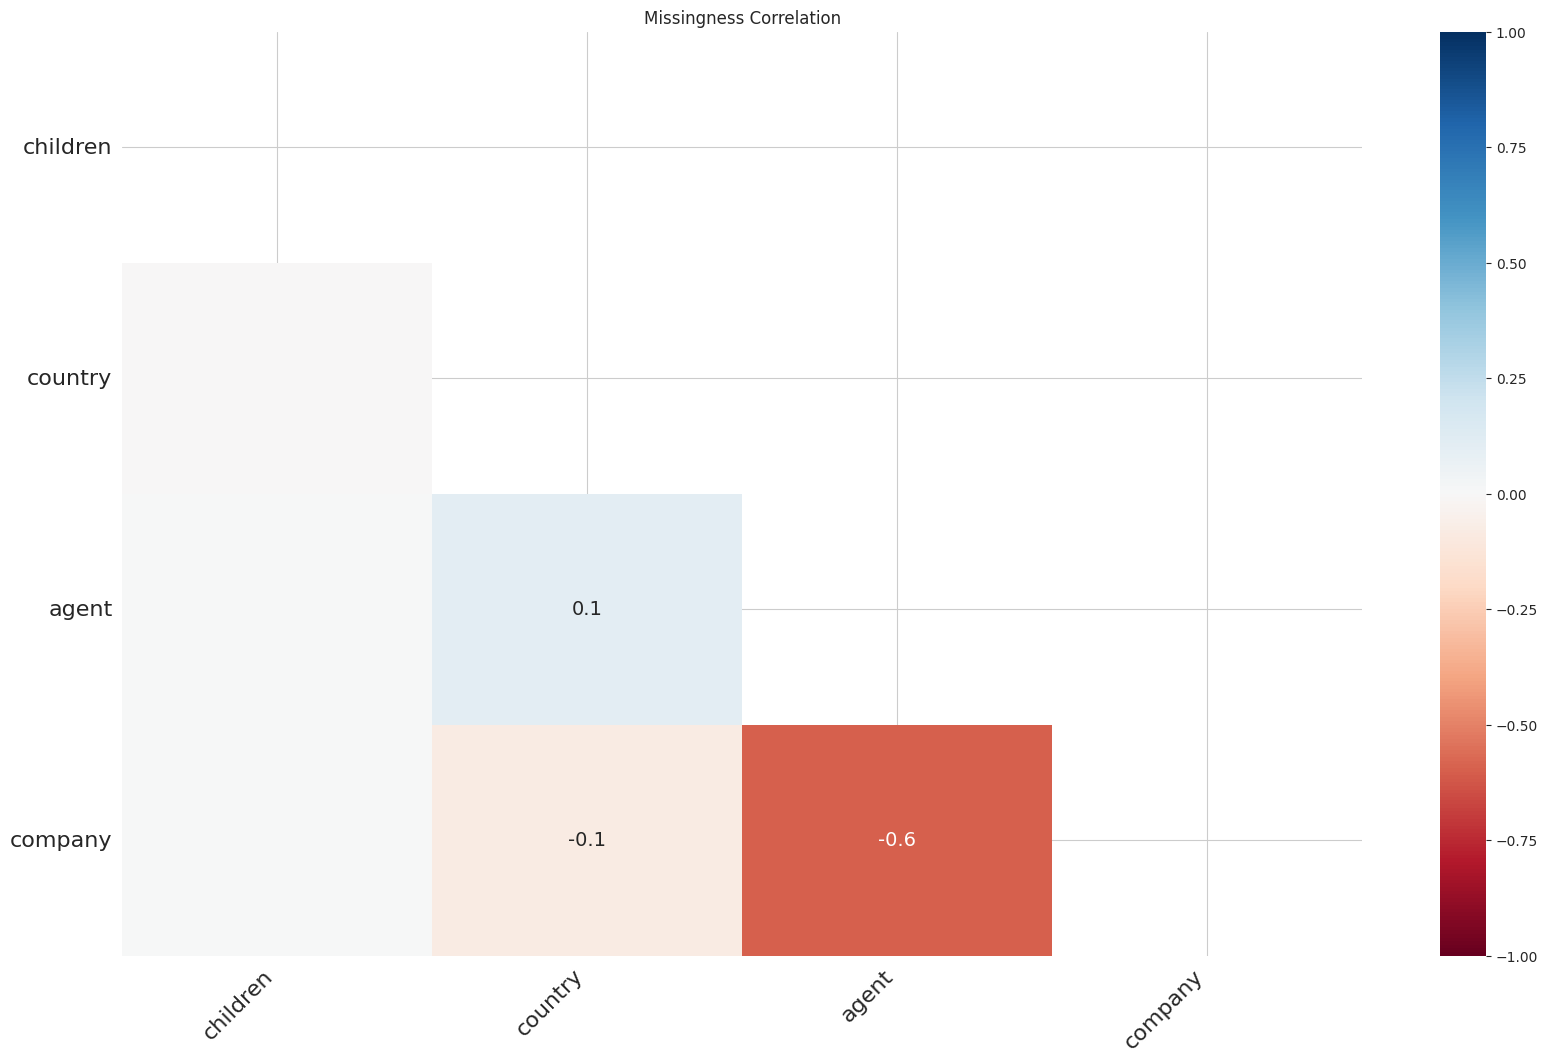

,n_missing,pct
company,112593,0.9431
agent,16340,0.1369
country,488,0.0041
children,4,0.0000
arrival_date_month,0,0.0000
arrival_date_week_number,0,0.0000
hotel,0,0.0000
is_canceled,0,0.0000
stays_in_weekend_nights,0,0.0000
arrival_date_day_of_month,0,0.0000


from matplotlib import pyplot as plt
_df_0['n_missing'].plot(kind='hist', bins=20, title='n_missing')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['pct'].plot(kind='hist', bins=20, title='pct')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='n_missing', y='pct', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['n_missing'].plot(kind='line', figsize=(8, 4), title='n_missing')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['pct'].plot(kind='line', figsize=(8, 4), title='pct')
plt.gca().spines[['top', 'right']].set_visible(False)

In [8]:
msno.matrix(df)
plt.title('Missingness Matrix')
plt.show()

msno.bar(df)
plt.title('Missing Values per Column')
plt.show()

msno.heatmap(df)
plt.title('Missingness Correlation')
plt.show()

na_tbl = (df.isna().sum().to_frame('n_missing')
            .assign(pct=lambda t: (t['n_missing']/len(df)).round(4))
            .sort_values('n_missing', ascending = False))

display(na_tbl.head(15))

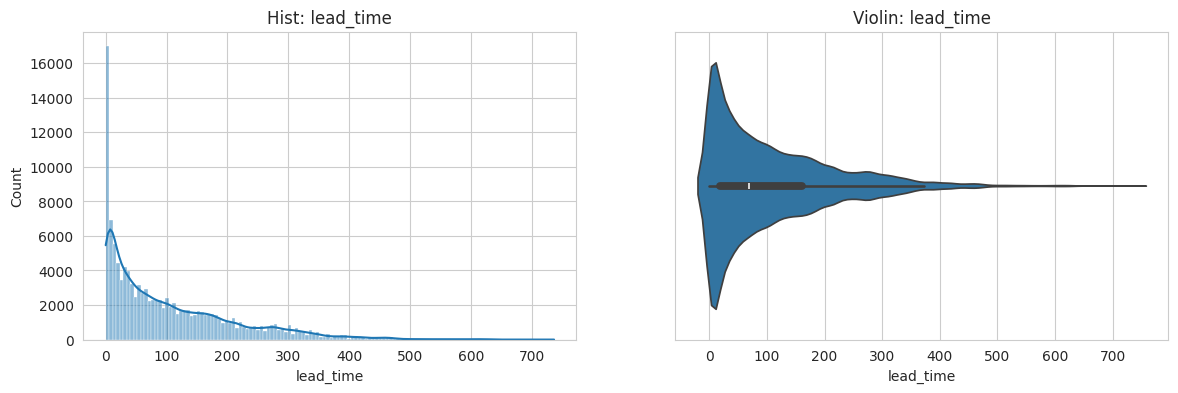

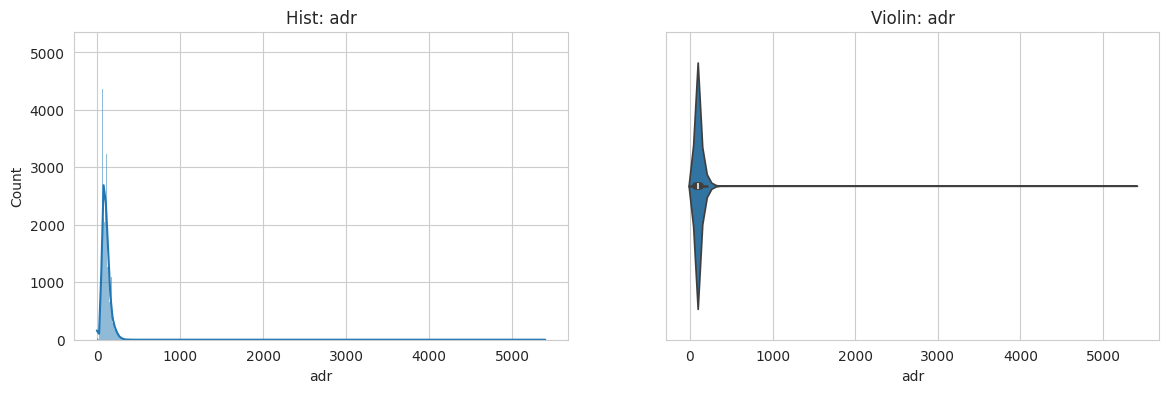

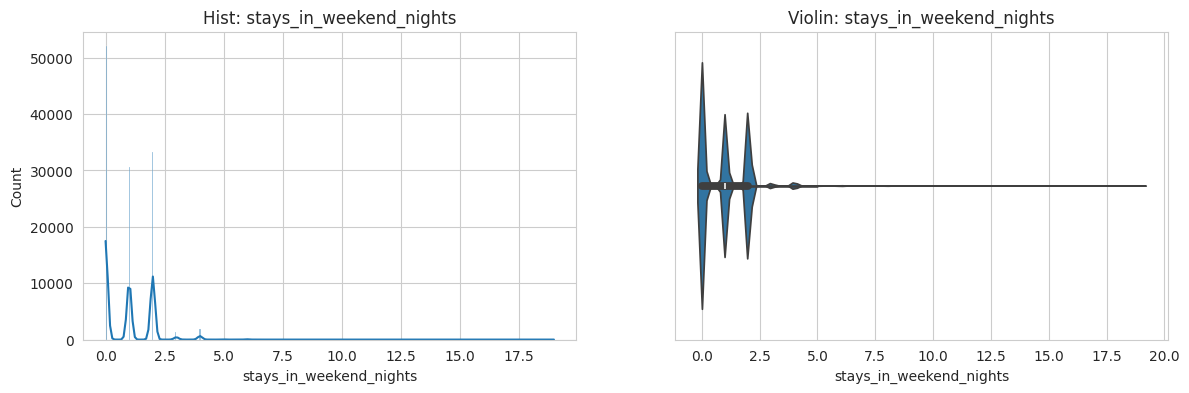

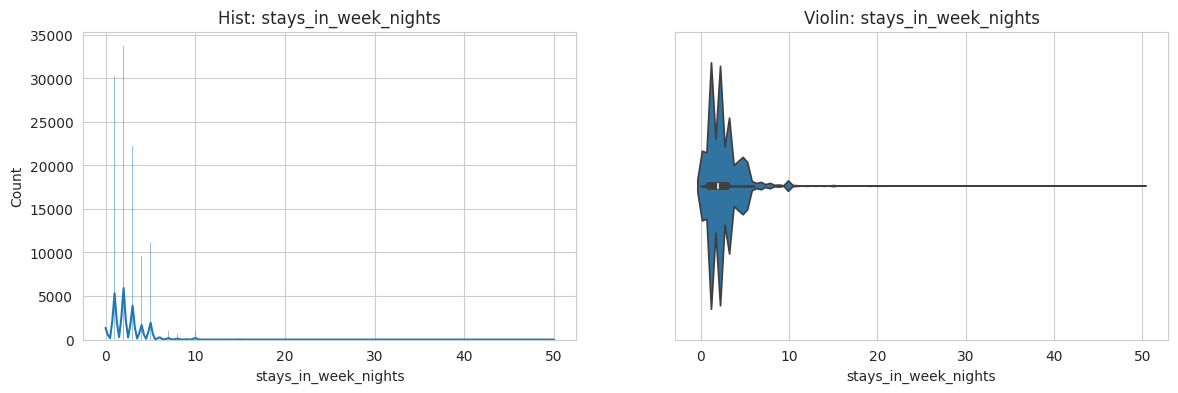

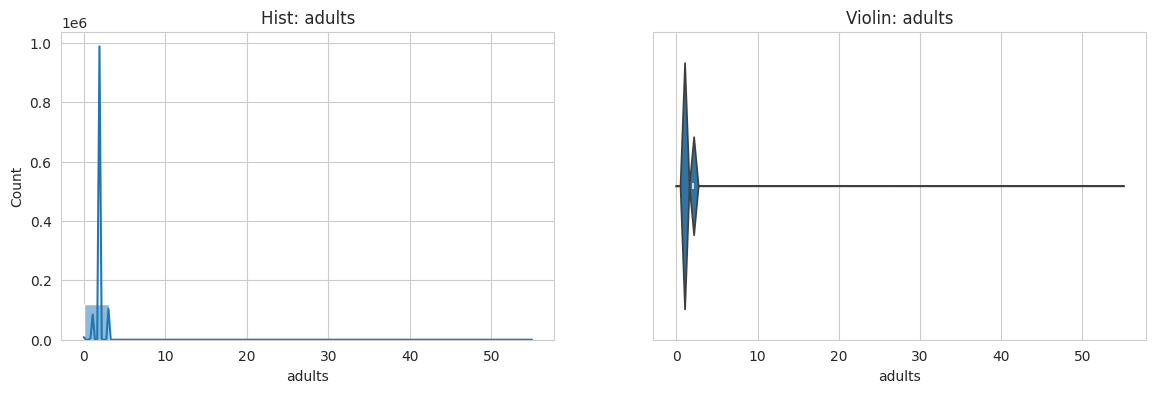

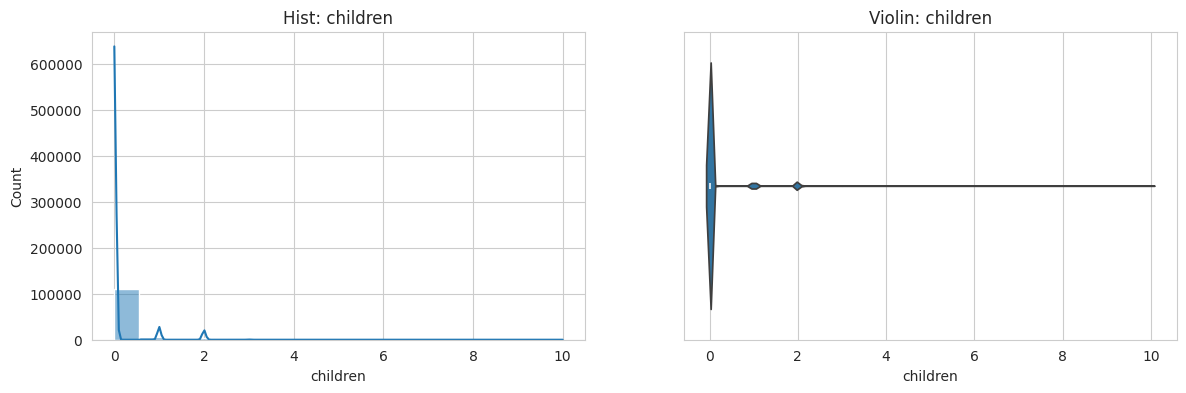

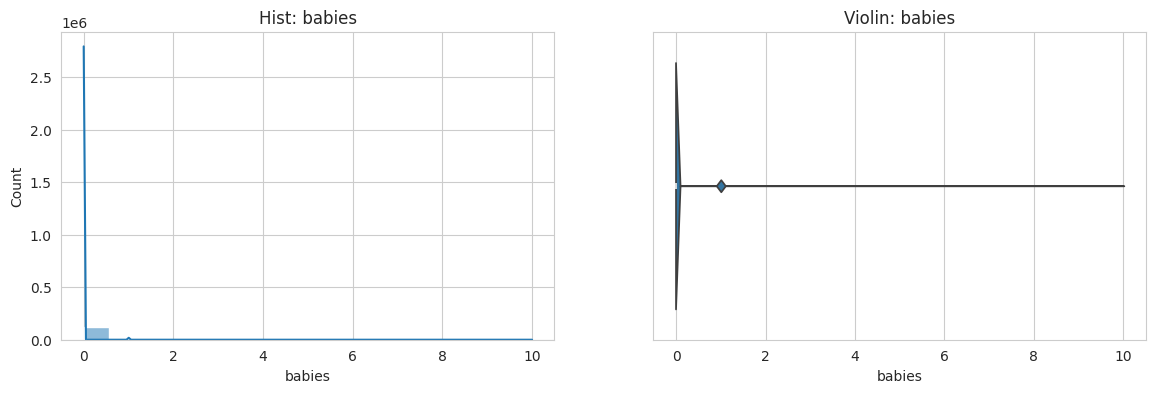


hotel (top values): 
'City Hotel': 79330
'Resort Hotel': 40060

arrival_date_month (top values): 
'August': 13877
'July': 12661
'May': 11791
'October': 11160
'April': 11089
'June': 10939
'September': 10508
'March': 9794
'February': 8068
'November': 6794

meal (top values): 
'BB': 92310
'HB': 14463
'SC': 10650
'Undefined': 1169
'FB': 798

country (top values): 
'PRT': 48590
'GBR': 12129
'FRA': 10415
'ESP': 8568
'DEU': 7287
'ITA': 3766
'IRL': 3375
'BEL': 2342
'BRA': 2224
'NLD': 2104

market_segment (top values): 
'Online TA': 56477
'Offline TA/TO': 24219
'Groups': 19811
'Direct': 12606
'Corporate': 5295
'Complementary': 743
'Aviation': 237
'Undefined': 2

distribution_channel (top values): 
'TA/TO': 97870
'Direct': 14645
'Corporate': 6677
'GDS': 193
'Undefined': 5


In [11]:
NUMERIC = df.select_dtypes(include=[np.number]).columns.tolist()
CATEG  = df.select_dtypes(exclude=[np.number]).columns.tolist()

def cat_summary(dframe, cols = None, top = 10):
    cols = cols or CATEG
    out = {}
    for c in cols:
        vc = dframe[c].value_counts(dropna = False).head(top)
        out[c] = vc
    return out

def plot_num(dframe, cols = None):
    cols = cols or NUMERIC
    for c in cols:
        fig, ax = plt.subplots()
        sns.histplot(dframe[c], kde = True, ax = ax)
        ax.set_title(f'Distribution: {c}')
        plt.show()

        fig, ax = plt.subplots()
        sns.boxplot(x = dframe[c], ax = ax)
        ax.set_title(f'Boxplot: {c}')
        plt.show()

for col in ['lead_time', 'adr', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies']:
    if col in df.columns:
        fig, ax = plt.subplots(1, 2, figsize = (14, 4))
        sns.histplot(df[col], kde = True, ax = ax[0]); ax[0].set_title(f'Hist: {col}')
        sns.violinplot(x = df[col], ax = ax[1]); ax[1].set_title(f'Violin: {col}')
        plt.show()

cat_glance = {k: dict(v) for k, v in cat_summary(df).items()}
for k, v in list(cat_glance.items())[:6]:
    print(f'\n{k} (top values): ')
    for kk, vv in v.items():
        print(f'{kk!r}: {vv}')

In [39]:
##### Phase 1: Exploratory Data Analysis (EDA) & Data Quality Report #####

#Findings after reviewing the dataset:

##Problem 1, Missing Values:
#Agent & Company ----> a large portion of values are missing
#Country ------------> some values are missing, mainly in a small number of rows
#Children -----------> only a few records have missing values

##Problem 2, Outliers:
#Average Daily Rate (adr) ---> contains unrealistic values, which skew the distribution
#Lead time ------------------> has very high values that result in a long right-skewed tail

##Problem 3, Duplicates:
#Exact duplicate rows exist in the dataset, these add no value and should be removed

##Problem 4, Inconsistent Values:
#Some rows show 0 total guests, which do not represent valid bookings

In [53]:
clean = df.copy()
before = clean.shape[0]
clean = clean.drop_duplicates()
print(f'Removed {before - clean.shape[0]} duplicate rows')

for c in ['agent', 'company']:
    if c in clean.columns:
        clean[c] = pd.to_numeric(clean[c], errors = 'coerce')

for c in ['company', 'agent']:
    if c in clean.columns:
        na_before = clean[c].isna().sum()
        clean[c] = clean[c].fillna(0).astype('Int64')
        print(f'{c}: filled {na_before} NA with 0 (Int64)')

if 'country' in clean.columns:
    mode_country = clean['country'].mode(dropna = True)
    mode_country = mode_country.iloc[0] if len(mode_country) else 'UNK'
    na_before = clean['country'].isna().sum()
    clean['country'] = clean['country'].fillna(mode_country)
    print(f'country: filled {na_before} NA with mode {mode_country}')

if 'children' in clean.columns:
    med_children = clean['children'].median()
    na_before = clean['children'].isna().sum()
    clean['children'] = clean['children'].fillna(med_children)
    print(f'children: filled {na_before} NA with median = {med_children}')

guests_cols = [c for c in ['adults','children','babies'] if c in clean.columns]
if set(guests_cols) == set(['adults','children','babies']):
    total_guests_tmp = clean['adults'] + clean['children'] + clean['babies']
    removed = (total_guests_tmp == 0).sum()
    clean = clean[total_guests_tmp > 0]
    print(f'Dropped {removed} rows with total guests == 0')

def cap_iqr(s, k = 1.5, name = None):
    q1, q3 = s.quantile([0.25, 0.75])
    iqr = q3 - q1
    low, high = q1 - k*iqr, q3 + k*iqr
    capped = s.clip(lower = low, upper = high)
    if name is not None:
        changed = (s != capped).sum()
        print(f'{name}: IQR cap -> changed {changed} values')
    return capped

for col in ['lead_time', 'adr']:
    if col in clean.columns:
        clean[col] = cap_iqr(clean[col], k=2.5, name=col)

if 'adr' in clean.columns:
    over_1000 = (clean['adr'] > 1000).sum()
    clean.loc[clean['adr'] > 1000, 'adr'] = 1000
    if over_1000:
        print(f'adr: additionally capped {over_1000} values above 1000 to 1000')

date_parts = ['arrival_date_year','arrival_date_month','arrival_date_day_of_month']
if all(c in clean.columns for c in date_parts):
    month_map = {m: i for i, m in enumerate(
        ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], start = 1)}
    month_series = clean['arrival_date_month'].map(lambda x: month_map.get(x, x))
    clean['arrival_month_num'] = pd.to_numeric(month_series, errors = 'coerce')
    clean['arrival_date'] = pd.to_datetime(dict(
        year=clean['arrival_date_year'].astype(int),
        month=clean['arrival_month_num'].fillna(1).astype(int),
        day=clean['arrival_date_day_of_month'].astype(int)
    ), errors='coerce')

for col in ['reservation_status', 'reservation_status_date']:
    if col in clean.columns:
        clean = clean.drop(columns=col)

print('Cleaning stage done. Shape: ', clean.shape, 'Memory MB: ', round(memory_mb(clean), 2))

Removed 31994 duplicate rows
company: filled 82137 NA with 0 (Int64)
agent: filled 12193 NA with 0 (Int64)
country: filled 452 NA with mode PRT
children: filled 4 NA with median = 0.0
Dropped 166 rows with total guests == 0
lead_time: IQR cap -> changed 302 values
adr: IQR cap -> changed 405 values
Cleaning stage done. Shape:  (87230, 32) Memory MB:  61.05


In [54]:
fe = clean.copy()

if set(['adults', 'children', 'babies']).issubset(fe.columns):
    fe['total_guests'] = fe['adults'] + fe['children'] + fe['babies']

if set(['stays_in_weekend_nights', 'stays_in_week_nights']).issubset(fe.columns):
    fe['total_nights'] = fe['stays_in_weekend_nights'] + fe['stays_in_week_nights']

if 'total_guests' in fe.columns:
    fe['is_family'] = np.where((fe.get('children', 0) + fe.get('babies', 0)) > 0, 1, 0).astype(int)

if {'total_guests', 'total_nights'}.issubset(fe.columns):
    fe['guest_density'] = fe['total_guests'] / (fe['total_nights'].replace(0, np.nan))
    fe['guest_density'] = fe['guest_density'].fillna(fe['total_guests'])

if {'stays_in_weekend_nights', 'total_nights'}.issubset(fe.columns):
    fe['weekend_ratio'] = fe['stays_in_weekend_nights'] / fe['total_nights'].replace(0, np.nan)
    fe['weekend_ratio'] = fe['weekend_ratio'].fillna(0)

if 'arrival_date' in fe.columns:
    fe['arrival_month'] = fe['arrival_date'].dt.month
    fe['arrival_year']  = fe['arrival_date'].dt.year
    fe['high_season']   = fe['arrival_month'].isin([6,7,8]).astype(int)

print('Feature engineering done alhamdulillah. New columns sample: ')
cols_new = ['total_guests', 'total_nights', 'is_family', 'guest_density', 'weekend_ratio', 'arrival_month', 'arrival_year', 'high_season']
display(fe[[c for c in cols_new if c in fe.columns]].head())

Feature engineering done alhamdulillah. New columns sample: 


,total_guests,total_nights,is_family,guest_density,weekend_ratio,arrival_month,arrival_year,high_season
0,2.0,0,0,2.0,0.0,7,2015,1
1,2.0,0,0,2.0,0.0,7,2015,1
2,1.0,1,0,1.0,0.0,7,2015,1
3,1.0,1,0,1.0,0.0,7,2015,1
4,2.0,2,0,1.0,0.0,7,2015,1


In [55]:
X = fe.copy()
cat_cols = X.select_dtypes(include = ['object', 'category']).columns.tolist()
low_card = [c for c in cat_cols if X[c].nunique(dropna = False) <= 12]
high_card = [c for c in cat_cols if c not in low_card]

print('Low-card OHE: ', low_card)
print('High-card freq-encode: ', high_card)

X = pd.get_dummies(X, columns = low_card, drop_first = True)
for c in high_card:
    freq = X[c].value_counts(normalize = True)
    X[c + '_freq'] = X[c].map(freq).fillna(0)
    X.drop(columns = c, inplace = True)

for c in ['agent', 'company']:
    if c in X.columns and X[c].dtype.kind in 'iu':
        freq = X[c].value_counts(normalize = True)
        X[c+'_freq'] = X[c].map(freq).fillna(0)
        X[c] = X[c].astype('Int64')

print('Encoded shape: ', X.shape)

Low-card OHE:  ['hotel', 'arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type']
High-card freq-encode:  ['country']
Encoded shape:  (87230, 83)


In [56]:
for c in ['adults', 'children', 'babies', 'stays_in_weekend_nights', 'stays_in_week_nights', 'total_nights', 'total_guests', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'required_car_parking_spaces', 'total_of_special_requests']:
    if c in X.columns:
        neg = (X[c] < 0).sum()
        if neg:
            print(f"Fixing negatives in {c}: {neg} rows -> set to 0")
            X.loc[X[c] < 0, c] = 0

if 'adr' in X.columns:
    neg_adr = (X['adr'] < 0).sum()
    if neg_adr:
        print(f'Fixing negative adr in {neg_adr} rows -> abs()')
        X['adr'] = X['adr'].abs()

na_total = X.isna().sum().sum()
if na_total:
    print(f'Filling remaining {na_total} missing values with column medians (numeric) / modes (categorical)')
    for col in X.columns:
        if X[col].isna().any():
            if pd.api.types.is_numeric_dtype(X[col]):
                X[col] = X[col].fillna(X[col].median())
            else:
                X[col] = X[col].fillna(X[col].mode(dropna = True)[0] if not X[col].mode(dropna = True).empty else 'Unknown')

print('Any NA left? ->', X.isna().sum().sum())

Fixing negative adr in 1 rows -> abs()
Any NA left? -> 0


In [57]:
from sklearn.model_selection import train_test_split

if 'is_canceled' in X.columns:
    y = X['is_canceled'].astype(int)
    X_final = X.drop(columns = ['is_canceled'])
else:
    y = None
    X_final = X

X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.20, random_state=SEED, stratify=y if y is not None else None)

print('Shapes ->')
print('X_train:', X_train.shape, 'X_test: ', X_test.shape)
if y is not None:
    print('y_train: ', y_train.shape, 'y_test: ', y_test.shape)

X.to_csv('hotel_bookings_cleaned_full.csv', index = False)
X_train.to_csv('hotel_bookings_train_X.csv', index = False)
X_test.to_csv('hotel_bookings_test_X.csv', index = False)

if y is not None:
    y_train.to_csv('hotel_bookings_train_y.csv', index = False)
    y_test.to_csv('hotel_bookings_test_y.csv', index = False)

print('\nSaved files: ')
for f in ['hotel_bookings_cleaned_full.csv', 'hotel_bookings_train_X.csv', 'hotel_bookings_test_X.csv',
          'hotel_bookings_train_y.csv', 'hotel_bookings_test_y.csv']:
    print('-', f, ' exists: ', Path(f).exists())

Shapes ->
X_train: (69784, 82) X_test:  (17446, 82)
y_train:  (69784,) y_test:  (17446,)

Saved files: 
- hotel_bookings_cleaned_full.csv  exists:  True
- hotel_bookings_train_X.csv  exists:  True
- hotel_bookings_test_X.csv  exists:  True
- hotel_bookings_train_y.csv  exists:  True
- hotel_bookings_test_y.csv  exists:  True


Leakage columns still present? []


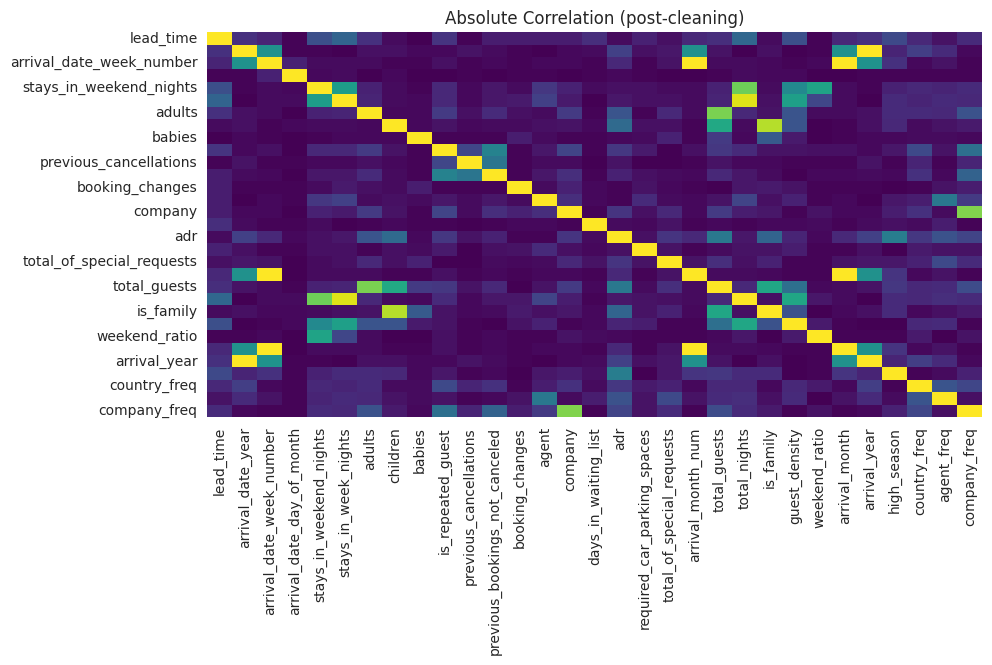

In [58]:
leak_cols = [c for c in ['reservation_status', 'reservation_status_date'] if c in X_final.columns]
print('Leakage columns still present?', leak_cols)

num_cols_post = X_final.select_dtypes(include = [np.number]).columns
corr = X_final[num_cols_post].corr().clip(-1,1)
sns.heatmap(corr.abs().round(2), cmap = 'viridis', cbar = False)
plt.title('Absolute Correlation (post-cleaning)')
plt.show()

In [61]:
from google.colab import files
files.download('hotel_bookings_cleaned_full.csv')
files.download('hotel_bookings_train_X.csv')
files.download('hotel_bookings_test_X.csv')
files.download('hotel_bookings_test_y.csv')
files.download('hotel_bookings_train_y.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>